In [1]:
import os
import sys
import import_ipynb
import pandas as pd
import numpy as np
#local lib
sys.path.insert(0, os.path.abspath('../KindScoreModel'))
import KindScore as ks
import SpeechRecognition as sr

importing Jupyter notebook from KindScore.ipynb
importing Jupyter notebook from SpeechRecognition.ipynb
Set minimum energy threshold to 486.4101159910297


### Read data source

In [2]:
df = pd.read_csv("data/dataset/dataReV5.csv")
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
...,...,...,...,...,...,...,...,...
64,รถจักรยานยนต์,ร้านอาหารญี่ปุ่น,ไม่ต้องต่อคิวซื้อเอง,ร้านไม่เปิดในช่วงปิดเทอม,5.2,NaN,10-20 นาที,40-80บาท
65,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิวเมื่อไหรก็สั่งได้,คนเยอะรอคิวนาน,8.4,NaN,5-15 นาที,30-150บาท
66,รถยนต์ส่วนตัว,ร้านข้าวต้มปลา,มีอาหารที่หลากหลาย,ไม่อยากไปต่อแถว,8.0,NaN,2-3 นาที,20-100บาท
67,เดิน,ร้านส้มตำ,มีโปรโมชั่นเยอะ,ไม่อยากกินอาหารที่ขายอยู่,4.4,NaN,10-15 นาที,50-70บาท


### Algorithm KindScore

Optimal Cluster Number:  5


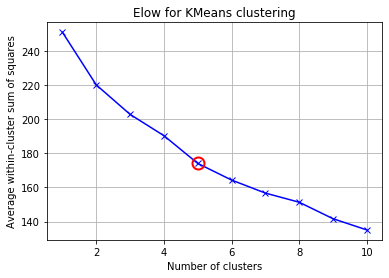

KindScore.ipynb:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "outputs": [],


In [3]:
data, model = ks.KindScoreModel(df,"Problem","score")

In [57]:
problemList =  []

### file wav
# problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/01.wav",15))
# problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/03.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/04.wav",15))

### file with convert
# problemList.append(sr.FileRecognitionWithConvertFile("/Users/fluke/Documents/RE/RE_Project/data/sound/ake.aac",15))

### said problem
# problemList.append(sr.SpeechRecognition("speech"))

# problemList.append("ถ้าคนเยอะก็ไม่อยากไปต่อคิว")
# problemList.append("ปัญหาอหกดฟหกดฟหดอ้ย")
# problemList.append("ปัญหาอหasfsadt4w5e sadfดอ้ย")
# problemList.append("ปัญหาอหกด79874 ดอ้ย")
# problemList.append("ไม่อยากกินอาหารที่ขายอยู่")
# ปัญหาด้านกลิ่นด้าน

### file wav V2
### Step one : call SpeechRecognition("file") 
### Step two : input path file [only type String]
### Step tree :input second to recognitions [only type Integer]
# problemList.append(sr.SpeechRecognition("file"))

x = sr.problem_CSV(pd.read_csv("data/dataReV6987.csv"), "Problem")

### Weight score new problem in same cluster and wirte file csv

In [58]:
data

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,3
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,3
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,3
...,...,...,...
67,ไม่อยากกินอาหารที่ขายอยู่,4.4,4
68,อาหารเหลือแต่ร้านที่ไม่อร่อย,5.2,0
69,มันก็แบบที่หน้าโรงอาหารก็อย่าว่ากันรอคิวนี้มัน...,7.8,3
70,ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่...,7.8,3


In [59]:
data.loc[data["cluster"]== 0]

,Problem,score,cluster
7,ไม่มีร้านอาหารที่ชอบ,3.2,0
14,อาหารที่อยากกินหมด,4.4,0
25,ไม่มีอาหารที่อยากกิน,3.8,0
27,ไม่ชอบกลิ่นที่โรงอาหาร,3.4,0
39,ควันที่ร้านข้าวตามสั่งทำเยอะทำให้ไม่อยากกิน,4.0,0
41,ที่ร้านลืมออเดอร์,6.2,0
43,เบื่ออาหารที่โรงอาหาร,3.4,0
46,วัตถุดิบที่ทำหมด,6.4,0
50,ที่นั้งไม่เพียงพอกับจำนวนนักศึกษา,6.8,0
52,ไม่มีเมนูที่อยากทาน,4.2,0


In [60]:
data.loc[data["cluster"]==  1]

,Problem,score,cluster
12,โรงอาหารคนเยอะทำให้ไม่อยากซื้อ,7.6,1
13,มีเวลาน้อยไม่สามารถต่อคิวได้,7.4,1
18,ไม่มีโต๊ะนั่งกินข้าว,5.8,1
21,ร้านอาหารมีคิวเยอะ,8.4,1
23,มีเวลาพักกินข้าวน้อย,6.8,1
26,หาโต๊ะนั่งไม่ได้,6.2,1
29,"ควันเยอะ, ร้อน, แมลงวัน ไม่ค่อยน่านั่ง",4.8,1
33,คนเยอะ เบื่ออาหารในคณะ วุ่นวาย ร้อน,5.4,1
34,มาทำงานวันหยุดไม่มีร้านอาหารเปิด,5.4,1
35,ทำงานดึกทำให้ไม่มีร้านอาหารเปิด,6.2,1


In [61]:
data.loc[data["cluster"]== 2]

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
30,คนเยอะ ต่อคิวนาน,8.2,2
32,ขี้เกียจต่อแถว,8.0,2
55,มีเวลาพักไม่พอต่อคิว,8.2,2
58,โรงอาหารคนต่อคิวเยอะ,8.2,2
59,คนรอสั่งอาหารเยอะ,8.4,2
65,คนเยอะรอคิวนาน,8.4,2
66,ไม่อยากไปต่อแถว,8.0,2
71,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2


In [62]:
data.loc[data["cluster"]== 3]

,Problem,score,cluster
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,3
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,3
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,3
5,ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ,7.8,3
6,ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...,8.8,3
8,ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา,8.4,3
9,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,3
11,อยากกินอาหารแปลกใหม่,3.6,3
15,ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน,8.0,3


In [63]:
data.loc[data["cluster"]== 4]

,Problem,score,cluster
10,เบื่อร้านอาหารที่มีอยู่,3.4,4
16,เบื่อร้านอาหารที่มีอยู่,3.0,4
67,ไม่อยากกินอาหารที่ขายอยู่,4.4,4



<hr size="3" />

<h1> Weigth The importance of the problem by similarity in same cluster problem</h1>

### conditions 1
* similarity > 0.7  in cluster |

### conditions 2
* similarity > 0.7  in nor cluster|

### conditions 3
* similarity < 0.7   write problem not match |

### Tips use the  ks.Weightscore
### ks.Weightscore(a, b, c, d, e)
<label>a = Path want to save Problem matching in dataset</label><br>
<label>b = List new problem</label><br>
<label>c = dataset | it must has featue cluster</label><br>
<label>d = model | after train in kindscore algorithm</label><br>
<label>e Path want to savePath Problem not matching in dataset</label><br>

In [64]:
# ks.Weightscore("data/dataReV656",problemList,data,model,"Problem","score")
dataset, cluster_newProblem = ks.Weightscore("data/dataReVXXX",x,data,model,"data/dataNotmatt")

 ถ้าคนเยอะก็ไม่อยากไปต่อคิว 9.0 1.0000000000000004 ถ้าคนเยอะก็ไม่อยากไปต่อคิว
state_similarity >= 0.7 || 1
ไม่มีอะไรน่ากิน 3.0 1.0 ไม่มีอะไรน่ากิน
state_similarity >= 0.7 || 1
ถ้าคิวยาวก็ไม่ซื้อ 8.6 1.0 ถ้าคิวยาวก็ไม่ซื้อ
state_similarity >= 0.7 || 1
ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น 7.8 0.9999999999999999 ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น
state_similarity >= 0.7 || 1
ถ้าแถวยาวมากก็จะขี้เกียจรอ 8.0 0.9999999999999998 ถ้าแถวยาวมากก็จะขี้เกียจรอ
state_similarity >= 0.7 || 1
ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ 7.8 0.9999999999999999 ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ
state_similarity >= 0.7 || 1
ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่กินเลย 8.8 1.0000000000000002 ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่กินเลย
state_similarity >= 0.7 || 1
ไม่มีร้านอาหารที่ชอบ 3.2 0.9999999999999997 ไม่มีร้านอาหารที่ชอบ
state_similarity >= 0.7 || 1
ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา 8.4 1.0000000000000004 ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา
state_similarity >= 0.7 || 1
ถ้าคิวยาวเก

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


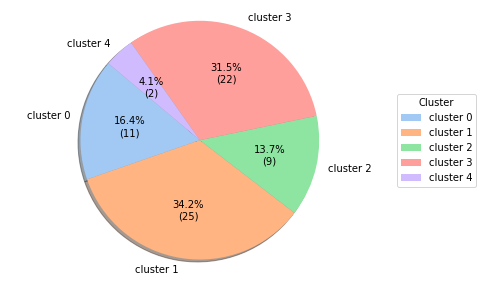

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,3
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,3
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,3
...,...,...,...
68,อาหารเหลือแต่ร้านที่ไม่อร่อย,5.2,0
69,มันก็แบบที่หน้าโรงอาหารก็อย่าว่ากันรอคิวนี้มัน...,7.8,3
70,ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่...,7.8,3
71,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2


In [65]:
ks.pieplot(dataset)

dataset

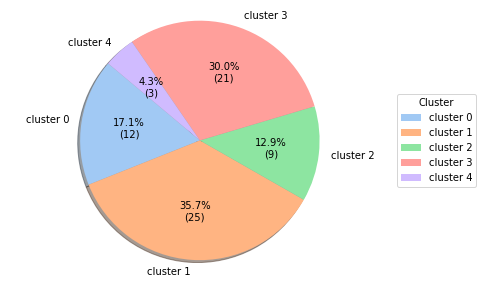

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,2
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,3
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,3
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,3
...,...,...,...
65,คนเยอะรอคิวนาน,8.4,2
66,ไม่อยากไปต่อแถว,8.0,2
67,ไม่อยากกินอาหารที่ขายอยู่,4.4,4
68,อาหารเหลือแต่ร้านที่ไม่อร่อย,5.2,0


In [66]:
ks.pieplot(cluster_newProblem)

cluster_newProblem